### Data Import Visualization and Normalization of Indexes

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use("seaborn")

In [15]:
stocks = yf.download(["AMZN", "BA", "DIS", "IBM", "KO", "MSFT"], start="2014-01-01", end="2018-12-31")

[*********************100%***********************]  6 of 6 completed


In [16]:
stocks.to_csv("data/index_stocks.csv")

In [17]:
stocks = pd.read_csv("data/index_stocks.csv", header=[0,1], index_col=[0], parse_dates=[0]).Close

In [18]:
stocks

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,397.970001,136.669998,76.269997,185.529999,40.660000,37.160000
2014-01-03,396.440002,137.619995,76.110001,186.639999,40.459999,36.910000
2014-01-06,393.630005,138.410004,75.820000,186.000000,40.270000,36.130001
2014-01-07,398.029999,140.509995,76.339996,189.710007,40.389999,36.410000
2014-01-08,401.920013,140.820007,75.220001,187.970001,39.939999,35.759998
...,...,...,...,...,...,...
2018-12-21,1377.449951,304.549988,104.220001,110.940002,47.570000,98.230003
2018-12-24,1343.959961,294.160004,100.349998,107.570000,45.959999,94.129997
2018-12-26,1470.900024,313.929993,105.830002,111.389999,46.939999,100.559998


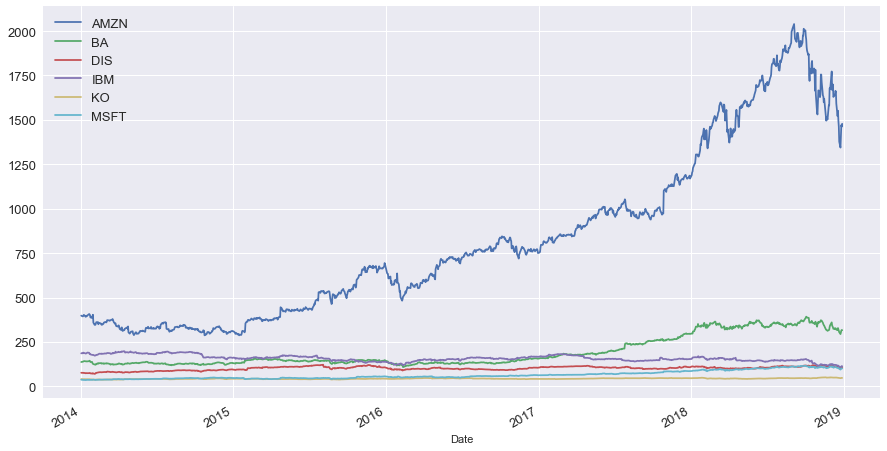

In [20]:
stocks.plot(figsize=(15,8), fontsize=13)
plt.legend(fontsize=13)


In [21]:
norm = stocks.div(stocks.iloc[0]) * 100

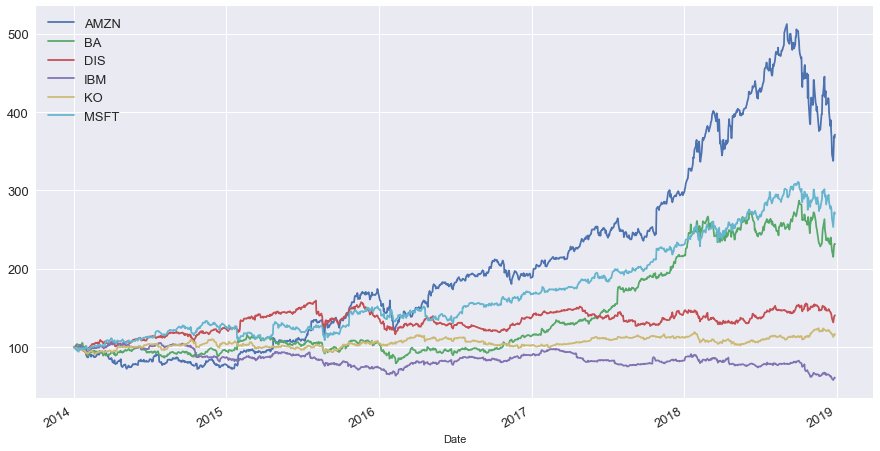

In [22]:
norm.plot(figsize=(15,8), fontsize=13)
plt.legend(fontsize=13)


### Creating a Price-weighted Index

In [23]:
stocks.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,397.970001,136.669998,76.269997,185.529999,40.660000,37.160000
2014-01-03,396.440002,137.619995,76.110001,186.639999,40.459999,36.910000
2014-01-06,393.630005,138.410004,75.820000,186.000000,40.270000,36.130001
2014-01-07,398.029999,140.509995,76.339996,189.710007,40.389999,36.410000
2014-01-08,401.920013,140.820007,75.220001,187.970001,39.939999,35.759998


In [24]:
norm.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2014-01-03,99.615549,100.695103,99.790224,100.598286,99.508114,99.327234
2014-01-06,98.909466,101.273144,99.409995,100.253329,99.040828,97.228206
2014-01-07,100.015076,102.809685,100.091779,102.253009,99.335956,97.981701
2014-01-08,100.992540,103.036518,98.623318,101.315153,98.229215,96.232504


In [25]:
stocks.sum(axis=1)

Date
2014-01-02     874.259995
2014-01-03     874.179996
2014-01-06     870.260010
2014-01-07     881.389996
2014-01-08     881.630020
                 ...     
2018-12-21    2042.959946
2018-12-24    1986.129959
2018-12-26    2149.550014
2018-12-27    2147.790024
2018-12-28    2162.320026
Length: 1257, dtype: float64

In [26]:
stocks.sum(axis=1).div(stocks.sum(axis=1)[0]).mul(100)

Date
2014-01-02    100.000000
2014-01-03     99.990850
2014-01-06     99.542472
2014-01-07    100.815547
2014-01-08    100.843002
                 ...    
2018-12-21    233.678764
2018-12-24    227.178410
2018-12-26    245.870797
2018-12-27    245.669485
2018-12-28    247.331462
Length: 1257, dtype: float64

In [55]:
norm["PWI"] = stocks.sum(axis=1).div(stocks.sum(axis=1)[0]).mul(100)

In [28]:
norm.head()

,AMZN,BA,DIS,IBM,KO,MSFT,PWI
Date,,,,,,,
2014-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2014-01-03,99.615549,100.695103,99.790224,100.598286,99.508114,99.327234,99.990850
2014-01-06,98.909466,101.273144,99.409995,100.253329,99.040828,97.228206,99.542472
2014-01-07,100.015076,102.809685,100.091779,102.253009,99.335956,97.981701,100.815547
2014-01-08,100.992540,103.036518,98.623318,101.315153,98.229215,96.232504,100.843002


<AxesSubplot:xlabel='Date'>

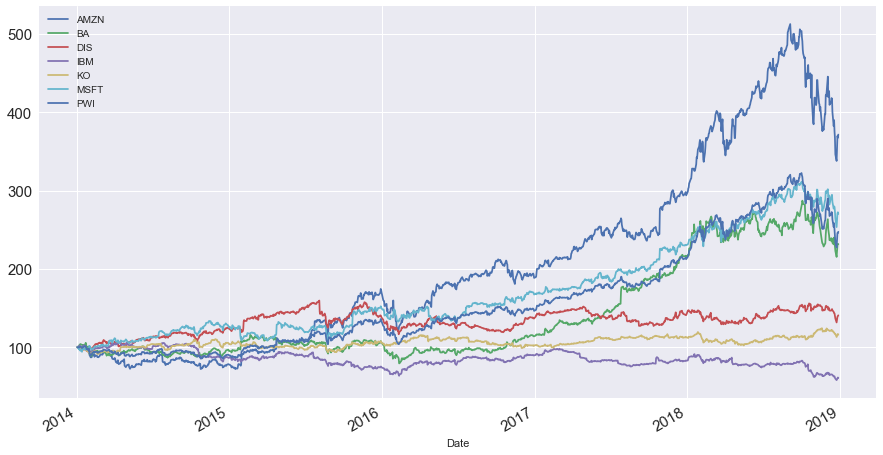

In [30]:
norm.plot(figsize=(15,8), fontsize=15)

<AxesSubplot:xlabel='Date'>

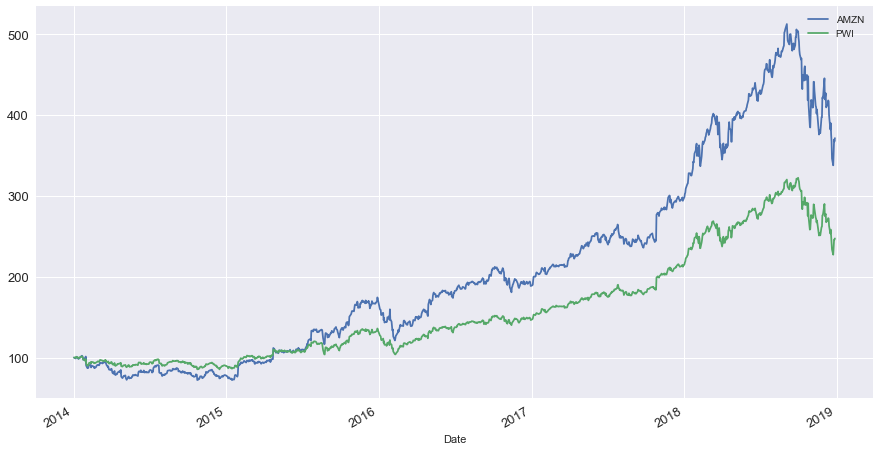

In [31]:
norm.loc[:, ["AMZN", "PWI"]].plot(figsize=(15,8), fontsize=13)

<AxesSubplot:xlabel='Date'>

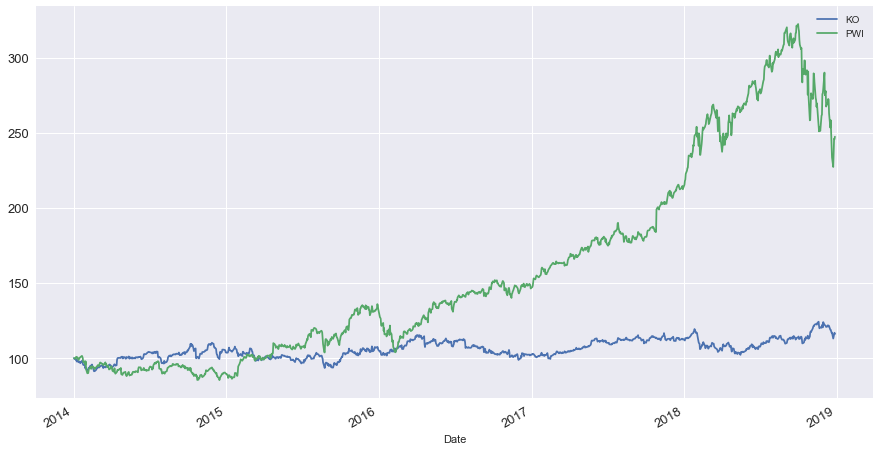

In [32]:
norm.loc[:, ["KO", "PWI"]].plot(figsize=(15,8), fontsize=13)

In [33]:
stocks.div(stocks.sum(axis=1), axis="rows")

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,0.455208,0.156326,0.087239,0.212214,0.046508,0.042505
2014-01-03,0.453499,0.157428,0.087064,0.213503,0.046283,0.042222
2014-01-06,0.452313,0.159044,0.087123,0.213729,0.046274,0.041516
2014-01-07,0.451594,0.159419,0.086613,0.215240,0.045825,0.041310
2014-01-08,0.455883,0.159727,0.085319,0.213207,0.045302,0.040561
...,...,...,...,...,...,...
2018-12-21,0.674242,0.149073,0.051014,0.054304,0.023285,0.048082
2018-12-24,0.676673,0.148107,0.050525,0.054161,0.023140,0.047394
2018-12-26,0.684283,0.146045,0.049234,0.051820,0.021837,0.046782


In [34]:
weights_PWI = stocks.div(stocks.sum(axis=1), axis="rows")

<AxesSubplot:xlabel='Date'>

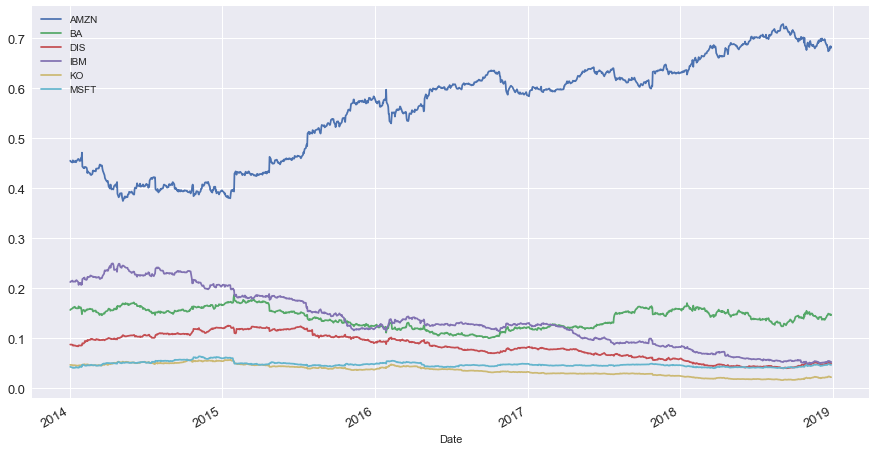

In [35]:
weights_PWI.plot(figsize=(15,8), fontsize=13)

### Equal Weighted Index Creation

In [36]:
ret = stocks.pct_change().dropna()

In [37]:
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-03,-0.003845,0.006951,-0.002098,0.005983,-0.004919,-0.006728
2014-01-06,-0.007088,0.005741,-0.003810,-0.003429,-0.004696,-0.021132
2014-01-07,0.011178,0.015172,0.006858,0.019946,0.002980,0.007750
2014-01-08,0.009773,0.002206,-0.014671,-0.009172,-0.011141,-0.017852
2014-01-09,-0.002264,0.009303,-0.004254,-0.003139,-0.005258,-0.006432


In [38]:
ret["Mean_ret"] = ret.mean(axis=1)

In [39]:
ret.head()

,AMZN,BA,DIS,IBM,KO,MSFT,Mean_ret
Date,,,,,,,
2014-01-03,-0.003845,0.006951,-0.002098,0.005983,-0.004919,-0.006728,-0.000776
2014-01-06,-0.007088,0.005741,-0.003810,-0.003429,-0.004696,-0.021132,-0.005736
2014-01-07,0.011178,0.015172,0.006858,0.019946,0.002980,0.007750,0.010647
2014-01-08,0.009773,0.002206,-0.014671,-0.009172,-0.011141,-0.017852,-0.006810
2014-01-09,-0.002264,0.009303,-0.004254,-0.003139,-0.005258,-0.006432,-0.002007


In [40]:
ret.Mean_ret.add(1).cumprod().mul(100)

Date
2014-01-03     99.922418
2014-01-06     99.349275
2014-01-07    100.407087
2014-01-08     99.723361
2014-01-09     99.523181
                 ...    
2018-12-21    175.330386
2018-12-24    169.441552
2018-12-26    179.083168
2018-12-27    180.594646
2018-12-28    180.437838
Name: Mean_ret, Length: 1256, dtype: float64

In [46]:
norm["EWI"] = 100

In [47]:
norm.iloc[1:, -1]=ret.Mean_ret.add(1).cumprod().mul(100)

In [52]:
norm

,AMZN,BA,DIS,IBM,KO,MSFT,PWI,EWI
Date,,,,,,,,
2014-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2014-01-03,99.615549,100.695103,99.790224,100.598286,99.508114,99.327234,99.922418,99.922418
2014-01-06,98.909466,101.273144,99.409995,100.253329,99.040828,97.228206,99.349275,99.349275
2014-01-07,100.015076,102.809685,100.091779,102.253009,99.335956,97.981701,100.407087,100.407087
2014-01-08,100.992540,103.036518,98.623318,101.315153,98.229215,96.232504,99.723361,99.723361
...,...,...,...,...,...,...,...,...
2018-12-21,346.119041,222.836022,136.646133,59.796261,116.994589,264.343390,175.330386,175.330386
2018-12-24,337.703836,215.233780,131.572050,57.979842,113.034922,253.310004,169.441552,169.441552
2018-12-26,369.600729,229.699273,138.757056,60.038808,115.445152,270.613558,179.083168,179.083168


<AxesSubplot:xlabel='Date'>

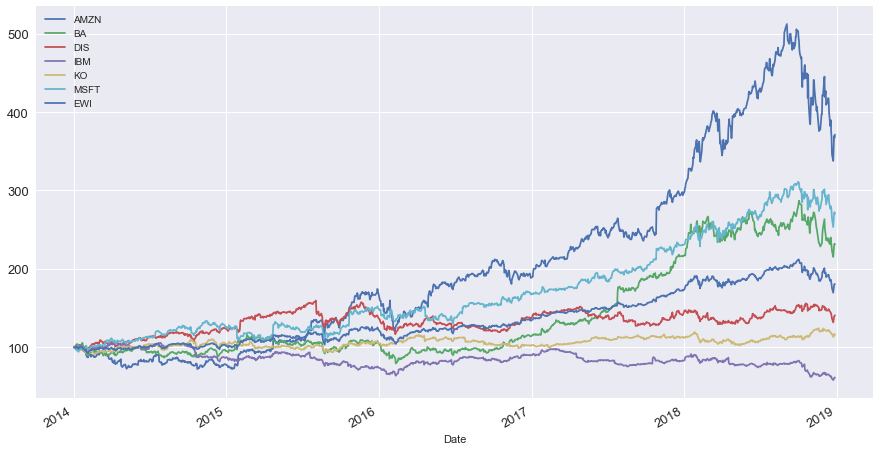

In [50]:
norm.iloc[:, [0,1,2,3,4,5,7]].plot(figsize=(15,8), fontsize=13)

<AxesSubplot:xlabel='Date'>

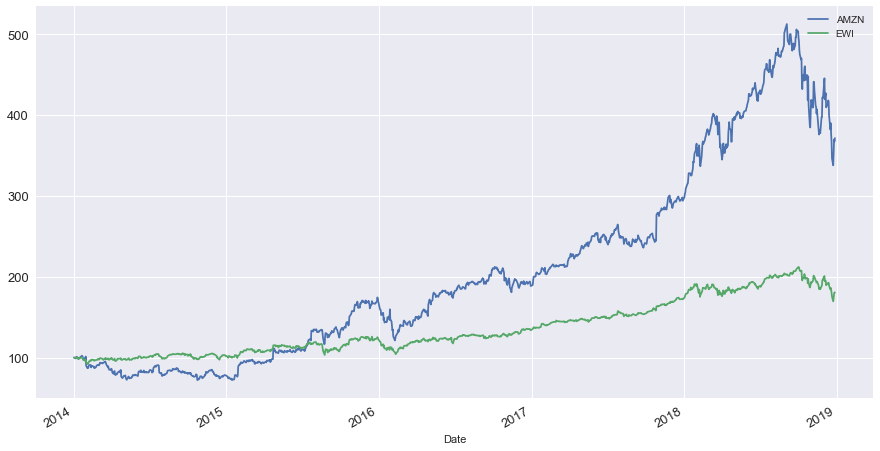

In [53]:
norm.loc[:, ["AMZN", "EWI"]].plot(figsize=(15,8), fontsize=13)

<AxesSubplot:xlabel='Date'>

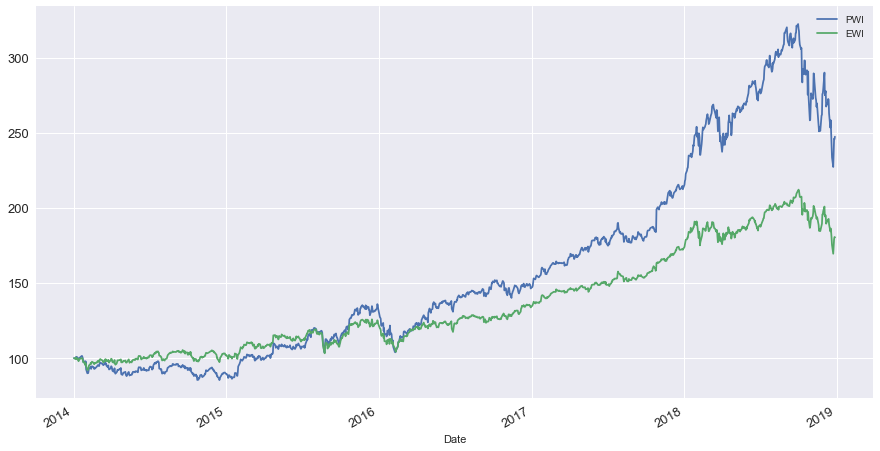

In [59]:
norm.iloc[:, -2:].plot(figsize=(15,8), fontsize=13)

In [60]:
weights_EWI = stocks.copy()

In [61]:
weights_EWI.iloc[:,:] = (1/6)

In [62]:
weights_EWI

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
2014-01-03,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
2014-01-06,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
2014-01-07,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
2014-01-08,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
...,...,...,...,...,...,...
2018-12-21,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
2018-12-24,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667
2018-12-26,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667


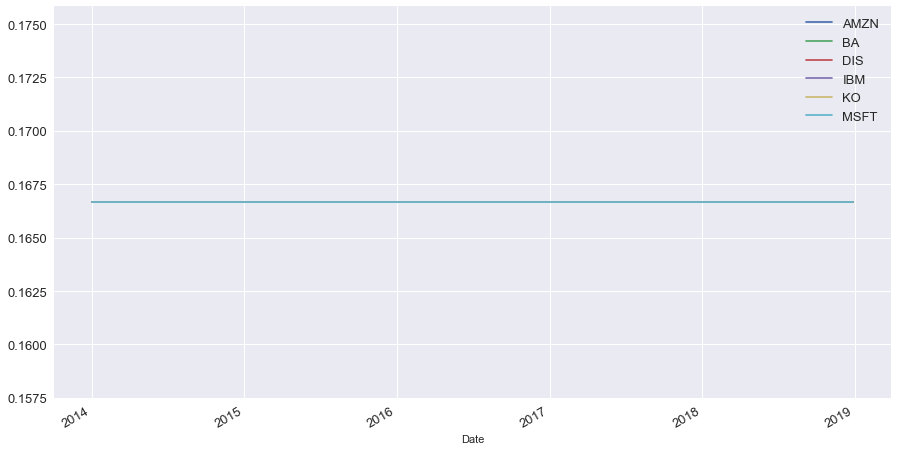

In [63]:
weights_EWI.plot(figsize=(15,8), fontsize=13)
plt.legend(fontsize=13)


### Value Weighted Index Creation

In [64]:
listings = pd.read_csv("data/listings_clean.csv")

In [65]:
listings.head()

,Symbol,Exchange,Name,Last_Price,Market_Cap,IPO_Year,Sector,Industry
0,A,NYSE,"Agilent Technologies, Inc.",81.68,2.593470e+10,1999,Capital Goods,Biotechnology: Laboratory Analytical Instruments
1,AA,NYSE,Alcoa Corporation,29.15,5.407810e+09,2016,Basic Industries,Aluminum
2,AABA,NASDAQ,Altaba Inc.,75.39,4.278113e+10,1969,Technology,EDP Services
3,AAC,NYSE,"AAC Holdings, Inc.",2.16,5.314109e+07,2014,Health Care,Medical Specialities
4,AAL,NASDAQ,"American Airlines Group, Inc.",34.02,1.527687e+10,1969,Transportation,Air Freight/Delivery Services


In [66]:
listings.tail()

,Symbol,Exchange,Name,Last_Price,Market_Cap,IPO_Year,Sector,Industry
6847,ZUMZ,NASDAQ,Zumiez Inc.,26.72,6.819191e+08,2005,Consumer Services,Clothing/Shoe/Accessory Stores
6848,ZUO,NYSE,"Zuora, Inc.",19.79,2.147266e+09,2018,Technology,Computer Software: Prepackaged Software
6849,ZYME,NYSE,Zymeworks Inc.,15.74,5.040782e+08,2017,Health Care,Major Pharmaceuticals
6850,ZYNE,NASDAQ,"Zynerba Pharmaceuticals, Inc.",7.85,1.653995e+08,2015,Health Care,Major Pharmaceuticals
6851,ZYXI,NASDAQ,"Zynex, Inc.",5.02,1.618349e+08,1969,Health Care,Biotechnology: Electromedical & Electrotherape...


In [67]:
listings.set_index("Symbol", inplace=True)

In [69]:
ticker=["AMZN", "BA", "DIS", "IBM", "KO", "MSFT"]

In [70]:
listings = listings.loc[ticker, ["Last_Price", "Market_Cap"]]

In [71]:
listings

,Last_Price,Market_Cap
Symbol,,
AMZN,1847.33,9.074138e+11
BA,364.94,2.060020e+11
DIS,117.16,2.106093e+11
IBM,143.02,1.272687e+11
KO,46.64,1.993935e+11
MSFT,120.19,9.221233e+11


In [72]:
listings.Market_Cap.div(listings.Last_Price)

Symbol
AMZN    4.912029e+08
BA      5.644820e+08
DIS     1.797621e+09
IBM     8.898663e+08
KO      4.275161e+09
MSFT    7.672213e+09
dtype: float64

In [73]:
listings["Shares"] = listings.Market_Cap.div(listings.Last_Price)

In [74]:
listings

,Last_Price,Market_Cap,Shares
Symbol,,,
AMZN,1847.33,9.074138e+11,4.912029e+08
BA,364.94,2.060020e+11,5.644820e+08
DIS,117.16,2.106093e+11,1.797621e+09
IBM,143.02,1.272687e+11,8.898663e+08
KO,46.64,1.993935e+11,4.275161e+09
MSFT,120.19,9.221233e+11,7.672213e+09


In [75]:
stocks.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,397.970001,136.669998,76.269997,185.529999,40.660000,37.160000
2014-01-03,396.440002,137.619995,76.110001,186.639999,40.459999,36.910000
2014-01-06,393.630005,138.410004,75.820000,186.000000,40.270000,36.130001
2014-01-07,398.029999,140.509995,76.339996,189.710007,40.389999,36.410000
2014-01-08,401.920013,140.820007,75.220001,187.970001,39.939999,35.759998


In [76]:
stocks.tail()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2018-12-21,1377.449951,304.549988,104.220001,110.940002,47.570000,98.230003
2018-12-24,1343.959961,294.160004,100.349998,107.570000,45.959999,94.129997
2018-12-26,1470.900024,313.929993,105.830002,111.389999,46.939999,100.559998
2018-12-27,1461.640015,317.140015,106.519997,113.779999,47.529999,101.180000
2018-12-28,1478.020020,316.380005,107.300003,113.029999,47.200001,100.389999


In [77]:
mcap = stocks.mul(listings.Shares, axis="columns")

In [78]:
mcap

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,1.954840e+11,7.714775e+10,1.371046e+11,1.650969e+11,1.738281e+11,2.850995e+11
2014-01-03,1.947325e+11,7.768400e+10,1.368170e+11,1.660846e+11,1.729730e+11,2.831814e+11
2014-01-06,1.933522e+11,7.812995e+10,1.362957e+11,1.655151e+11,1.721607e+11,2.771971e+11
2014-01-07,1.955135e+11,7.931536e+10,1.372304e+11,1.688165e+11,1.726738e+11,2.793453e+11
2014-01-08,1.974243e+11,7.949035e+10,1.352171e+11,1.672682e+11,1.707499e+11,2.743583e+11
...,...,...,...,...,...,...
2018-12-21,6.766074e+11,1.719130e+11,1.873481e+11,9.872176e+10,2.033694e+11,7.536416e+11
2018-12-24,6.601570e+11,1.660480e+11,1.803913e+11,9.572291e+10,1.964864e+11,7.221854e+11
2018-12-26,7.225103e+11,1.772078e+11,1.902423e+11,9.912220e+10,2.006761e+11,7.715178e+11


<AxesSubplot:xlabel='Date'>

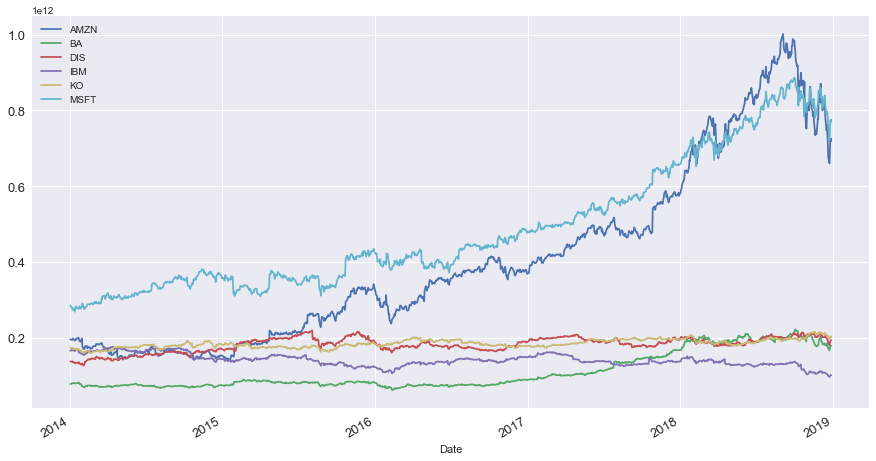

In [79]:
mcap.plot(figsize=(15,8), fontsize=13)

<AxesSubplot:xlabel='Date'>

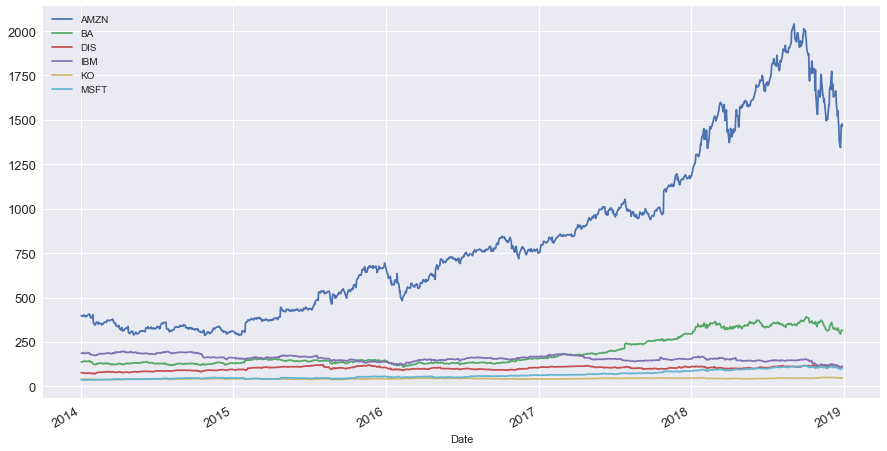

In [80]:
stocks.plot(figsize=(15,8), fontsize=13)

In [81]:
mcap.sum(axis=1)

Date
2014-01-02    1.033761e+12
2014-01-03    1.031473e+12
2014-01-06    1.022651e+12
2014-01-07    1.032895e+12
2014-01-08    1.024508e+12
                  ...     
2018-12-21    2.091601e+12
2018-12-24    2.020991e+12
2018-12-26    2.161276e+12
2018-12-27    2.169186e+12
2018-12-28    2.170066e+12
Length: 1257, dtype: float64

In [82]:
mcap.div(mcap.sum(axis=1), axis="index")

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,0.189100,0.074628,0.132627,0.159705,0.168151,0.275789
2014-01-03,0.188791,0.075314,0.132642,0.161017,0.167695,0.274541
2014-01-06,0.189070,0.076399,0.133277,0.161849,0.168348,0.271057
2014-01-07,0.189287,0.076789,0.132860,0.163440,0.167175,0.270449
2014-01-08,0.192702,0.077589,0.131982,0.163267,0.166665,0.267795
...,...,...,...,...,...,...
2018-12-21,0.323488,0.082192,0.089572,0.047199,0.097231,0.360318
2018-12-24,0.326650,0.082162,0.089259,0.047364,0.097223,0.357342
2018-12-26,0.334298,0.081992,0.088023,0.045863,0.092851,0.356973


In [83]:
weights_vwi = mcap.div(mcap.sum(axis=1), axis="index")

In [84]:
weights_vwi

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,0.189100,0.074628,0.132627,0.159705,0.168151,0.275789
2014-01-03,0.188791,0.075314,0.132642,0.161017,0.167695,0.274541
2014-01-06,0.189070,0.076399,0.133277,0.161849,0.168348,0.271057
2014-01-07,0.189287,0.076789,0.132860,0.163440,0.167175,0.270449
2014-01-08,0.192702,0.077589,0.131982,0.163267,0.166665,0.267795
...,...,...,...,...,...,...
2018-12-21,0.323488,0.082192,0.089572,0.047199,0.097231,0.360318
2018-12-24,0.326650,0.082162,0.089259,0.047364,0.097223,0.357342
2018-12-26,0.334298,0.081992,0.088023,0.045863,0.092851,0.356973


<AxesSubplot:xlabel='Date'>

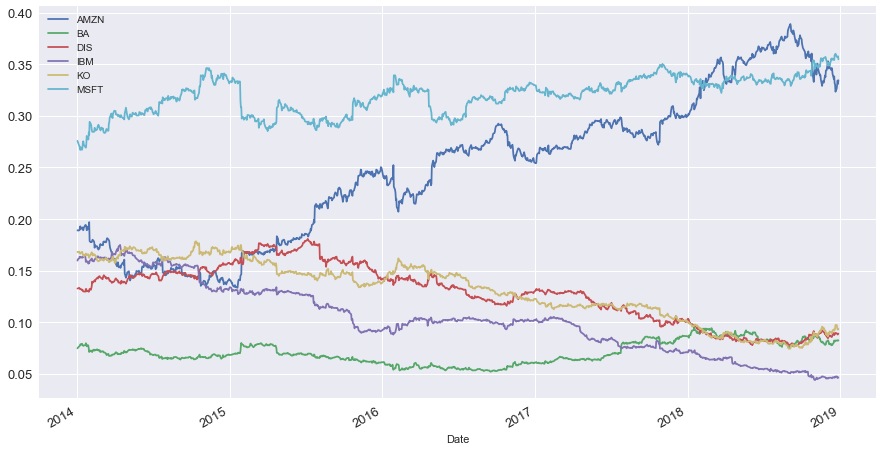

In [85]:
weights_vwi.plot(figsize=(15,8), fontsize=13)

In [86]:
ret = stocks.pct_change().dropna()

In [87]:
weights_vwi.shift().dropna()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-03,0.189100,0.074628,0.132627,0.159705,0.168151,0.275789
2014-01-06,0.188791,0.075314,0.132642,0.161017,0.167695,0.274541
2014-01-07,0.189070,0.076399,0.133277,0.161849,0.168348,0.271057
2014-01-08,0.189287,0.076789,0.132860,0.163440,0.167175,0.270449
2014-01-09,0.192702,0.077589,0.131982,0.163267,0.166665,0.267795
...,...,...,...,...,...,...
2018-12-21,0.330790,0.081462,0.088670,0.046363,0.093692,0.359023
2018-12-24,0.323488,0.082192,0.089572,0.047199,0.097231,0.360318
2018-12-26,0.326650,0.082162,0.089259,0.047364,0.097223,0.357342


In [88]:
ret.mul(weights_vwi.shift().dropna()).sum(axis=1)

Date
2014-01-03   -0.002214
2014-01-06   -0.008553
2014-01-07    0.010017
2014-01-08   -0.008120
2014-01-09   -0.003387
                ...   
2018-12-21   -0.035791
2018-12-24   -0.033759
2018-12-26    0.069414
2018-12-27    0.003660
2018-12-28    0.000406
Length: 1256, dtype: float64

In [89]:
norm["VWI"] = 100

In [90]:
norm

,AMZN,BA,DIS,IBM,KO,MSFT,PWI,EWI,VWI
Date,,,,,,,,,
2014-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100
2014-01-03,99.615549,100.695103,99.790224,100.598286,99.508114,99.327234,99.990850,99.922418,100
2014-01-06,98.909466,101.273144,99.409995,100.253329,99.040828,97.228206,99.542472,99.349275,100
2014-01-07,100.015076,102.809685,100.091779,102.253009,99.335956,97.981701,100.815547,100.407087,100
2014-01-08,100.992540,103.036518,98.623318,101.315153,98.229215,96.232504,100.843002,99.723361,100
...,...,...,...,...,...,...,...,...,...
2018-12-21,346.119041,222.836022,136.646133,59.796261,116.994589,264.343390,233.678764,175.330386,100
2018-12-24,337.703836,215.233780,131.572050,57.979842,113.034922,253.310004,227.178410,169.441552,100
2018-12-26,369.600729,229.699273,138.757056,60.038808,115.445152,270.613558,245.870797,179.083168,100


In [91]:
ret.mul(weights_vwi.shift().dropna()).sum(axis=1).add(1).cumprod().mul(100)

Date
2014-01-03     99.778650
2014-01-06     98.925285
2014-01-07     99.916238
2014-01-08     99.104959
2014-01-09     98.769275
                 ...    
2018-12-21    202.329335
2018-12-24    195.498922
2018-12-26    209.069313
2018-12-27    209.834454
2018-12-28    209.919561
Length: 1256, dtype: float64

In [92]:
norm.iloc[1: , -1] = ret.mul(weights_vwi.shift().dropna()).sum(axis=1).add(1).cumprod().mul(100)

In [93]:
norm

,AMZN,BA,DIS,IBM,KO,MSFT,PWI,EWI,VWI
Date,,,,,,,,,
2014-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2014-01-03,99.615549,100.695103,99.790224,100.598286,99.508114,99.327234,99.990850,99.922418,99.778650
2014-01-06,98.909466,101.273144,99.409995,100.253329,99.040828,97.228206,99.542472,99.349275,98.925285
2014-01-07,100.015076,102.809685,100.091779,102.253009,99.335956,97.981701,100.815547,100.407087,99.916238
2014-01-08,100.992540,103.036518,98.623318,101.315153,98.229215,96.232504,100.843002,99.723361,99.104959
...,...,...,...,...,...,...,...,...,...
2018-12-21,346.119041,222.836022,136.646133,59.796261,116.994589,264.343390,233.678764,175.330386,202.329335
2018-12-24,337.703836,215.233780,131.572050,57.979842,113.034922,253.310004,227.178410,169.441552,195.498922
2018-12-26,369.600729,229.699273,138.757056,60.038808,115.445152,270.613558,245.870797,179.083168,209.069313


<AxesSubplot:xlabel='Date'>

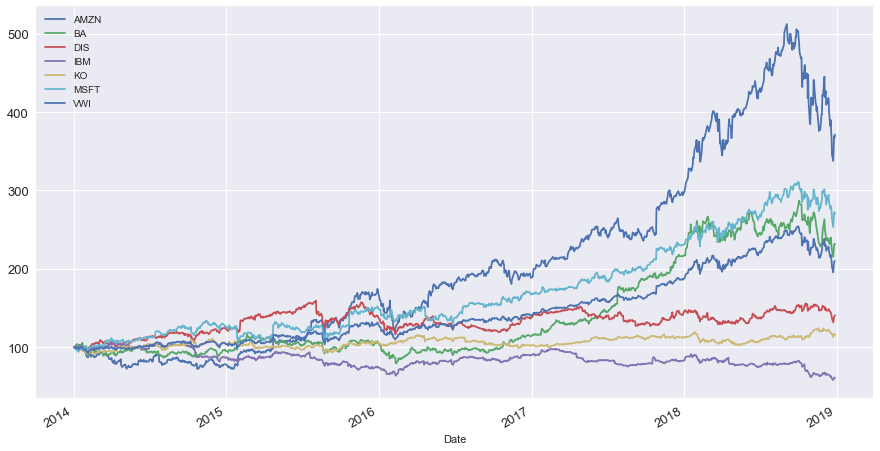

In [94]:
norm.iloc[:,[0,1,2,3,4,5,8]].plot(figsize=(15,8), fontsize=13)

### Comparing the Indexes

<AxesSubplot:xlabel='Date'>

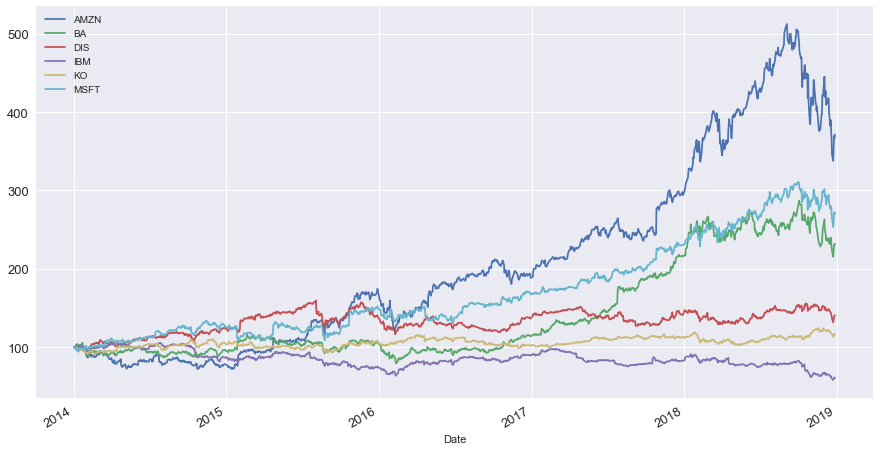

In [98]:
norm.iloc[:,:-3].plot(figsize=(15,8), fontsize=13)

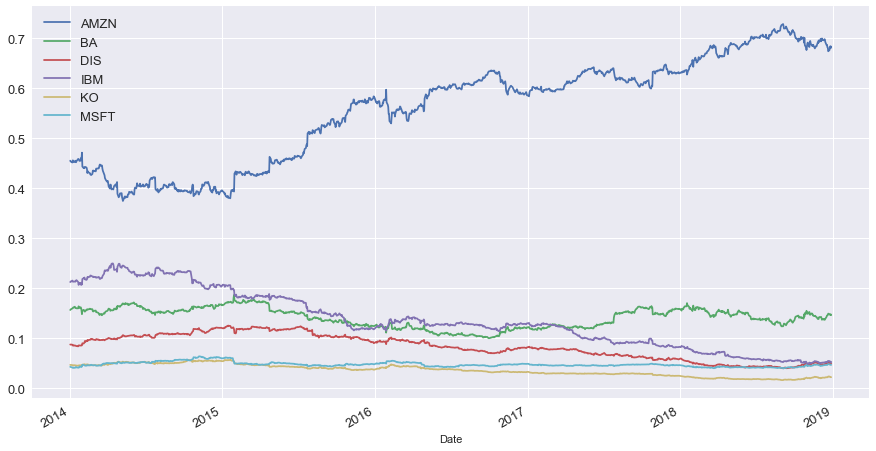

In [99]:
def plot(data):
    data.plot(figsize=(15,8), fontsize=13)
    plt.legend(fontsize=13)

plot(weights_PWI)

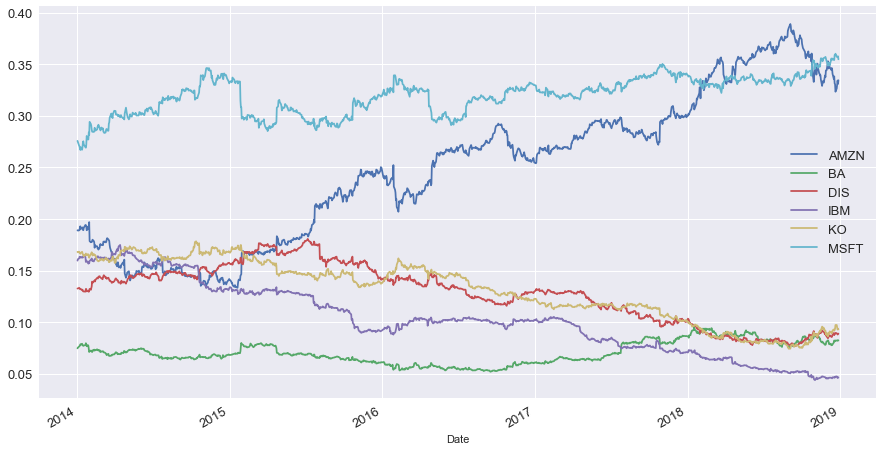

In [100]:
plot(weights_vwi)

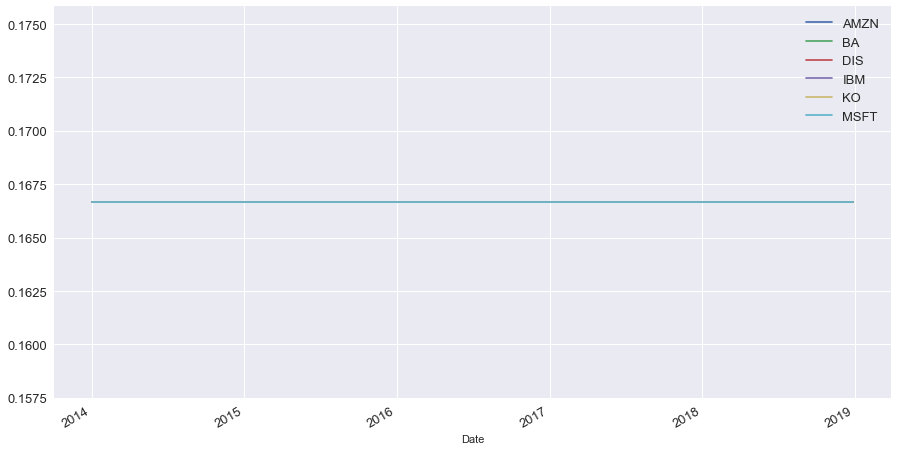

In [101]:
plot(weights_EWI)

In [102]:
summary = norm.pct_change().dropna().agg(["mean", "std"]).T

In [103]:
summary.head()

,mean,std
AMZN,0.001235,0.019527
BA,0.000777,0.014744
DIS,0.000343,0.011894
IBM,-0.000315,0.012609
KO,0.000157,0.008685


In [106]:
summary.columns=["Return", "Risk"]
summary["Return"] = summary["Return"]*252
summary["Risk"] = summary["Risk"]*np.sqrt(252)

In [107]:
summary

,Return,Risk
AMZN,0.311132,0.309982
BA,0.195869,0.234048
DIS,0.086376,0.188818
IBM,-0.079275,0.200160
KO,0.039464,0.137876
MSFT,0.226253,0.231876
PWI,0.204609,0.213950
EWI,0.129970,0.151747
VWI,0.164022,0.174414


Text(0, 0.5, 'ann. Return')

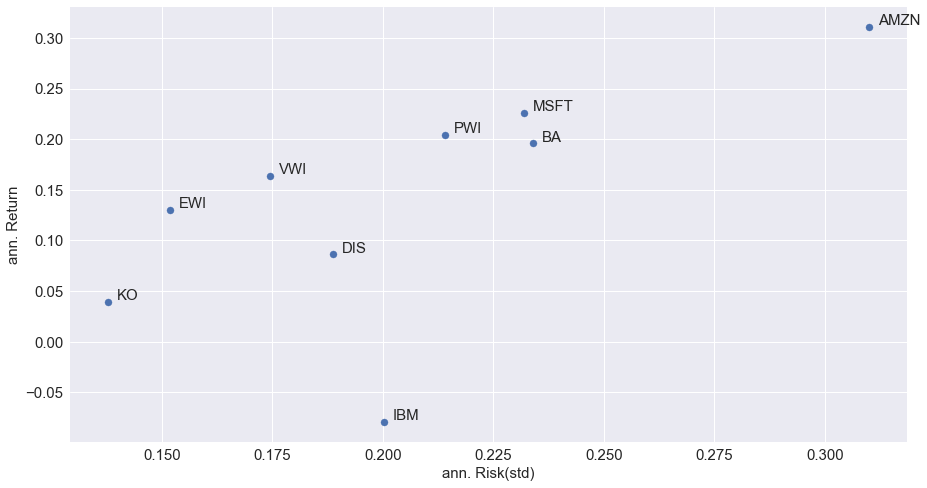

In [108]:
summary.plot(kind="scatter", x="Risk", y="Return", figsize=(15,8), s=50, fontsize=15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Risk"]+0.002, summary.loc[i, "Return"]+0.002), size=15)
plt.xlabel("ann. Risk(std)", fontsize=15)
plt.ylabel("ann. Return", fontsize=15)

### Price Index vs Performance Total Return Index

In [109]:
stocks = pd.read_csv("data/index_stocks.csv", header=[0,1], index_col=[0], parse_dates=[0])

In [110]:
adj_close = stocks["Adj Close"].copy()

In [111]:
adj_close

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,397.970001,116.807953,70.192497,139.235443,32.430054,32.057323
2014-01-03,396.440002,117.619873,70.045273,140.068451,32.270527,31.841665
2014-01-06,393.630005,118.295074,69.778374,139.588150,32.118996,31.168766
2014-01-07,398.029999,120.089874,70.256927,142.372406,32.214710,31.410315
2014-01-08,401.920013,120.354836,69.226189,141.066589,31.855783,30.849575
...,...,...,...,...,...,...
2018-12-21,1377.449951,295.930267,102.961693,99.260948,44.583309,95.563919
2018-12-24,1343.959961,285.834320,99.138412,96.245712,43.074390,91.575211
2018-12-26,1470.900024,305.044769,104.552254,99.663574,43.992859,97.830696


In [112]:
total_return = adj_close.pct_change().dropna()

In [113]:
close = stocks["Close"].copy()

In [114]:
weights=close.div(close.sum(axis=1), axis="index")

In [115]:
weights.head()

,AMZN,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2014-01-02,0.455208,0.156326,0.087239,0.212214,0.046508,0.042505
2014-01-03,0.453499,0.157428,0.087064,0.213503,0.046283,0.042222
2014-01-06,0.452313,0.159044,0.087123,0.213729,0.046274,0.041516
2014-01-07,0.451594,0.159419,0.086613,0.215240,0.045825,0.041310
2014-01-08,0.455883,0.159727,0.085319,0.213207,0.045302,0.040561


In [116]:
norm["PWI_perf"] = 100
norm.head()

,AMZN,BA,DIS,IBM,KO,MSFT,PWI,EWI,VWI,PWI_perf
Date,,,,,,,,,,
2014-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100
2014-01-03,99.615549,100.695103,99.790224,100.598286,99.508114,99.327234,99.990850,99.922418,99.778650,100
2014-01-06,98.909466,101.273144,99.409995,100.253329,99.040828,97.228206,99.542472,99.349275,98.925285,100
2014-01-07,100.015076,102.809685,100.091779,102.253009,99.335956,97.981701,100.815547,100.407087,99.916238,100
2014-01-08,100.992540,103.036518,98.623318,101.315153,98.229215,96.232504,100.843002,99.723361,99.104959,100


In [117]:
norm.iloc[1:, -1] = total_return.mul(weights.shift().dropna()).sum(axis=1).add(1).cumprod().mul(100)

In [118]:
norm

,AMZN,BA,DIS,IBM,KO,MSFT,PWI,EWI,VWI,PWI_perf
Date,,,,,,,,,,
2014-01-02,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2014-01-03,99.615549,100.695103,99.790224,100.598286,99.508114,99.327234,99.990850,99.922418,99.778650,99.990848
2014-01-06,98.909466,101.273144,99.409995,100.253329,99.040828,97.228206,99.542472,99.349275,98.925285,99.542471
2014-01-07,100.015076,102.809685,100.091779,102.253009,99.335956,97.981701,100.815547,100.407087,99.916238,100.815544
2014-01-08,100.992540,103.036518,98.623318,101.315153,98.229215,96.232504,100.843002,99.723361,99.104959,100.843001
...,...,...,...,...,...,...,...,...,...,...
2018-12-21,346.119041,222.836022,136.646133,59.796261,116.994589,264.343390,233.678764,175.330386,202.329335,247.257117
2018-12-24,337.703836,215.233780,131.572050,57.979842,113.034922,253.310004,227.178410,169.441552,195.498922,240.379045
2018-12-26,369.600729,229.699273,138.757056,60.038808,115.445152,270.613558,245.870797,179.083168,209.069313,260.157592


In [120]:
summary = norm.pct_change().dropna().agg(["mean", "std"])

In [121]:
summary

,AMZN,BA,DIS,IBM,KO,MSFT,PWI,EWI,VWI,PWI_perf
mean,0.001235,0.000777,0.000343,-0.000315,0.000157,0.000898,0.000812,0.000516,0.000651,0.000857
std,0.019527,0.014744,0.011894,0.012609,0.008685,0.014607,0.013478,0.009559,0.010987,0.013469
